In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd

In [24]:
# Kursdaten von Yahoo-Finance importieren
data = yf.download('AAPL', start='2019-01-01', end='2024-04-09')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845043,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075382,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530052,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450966,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126778,164101200
...,...,...,...,...,...,...
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500
2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47691700
2024-04-04,170.289993,171.919998,168.820007,168.820007,168.820007,53704400


In [4]:
missing_values = data.isnull().sum()
missing_per = (missing_values/data.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total fehlende Werte',1:'fehlende Werte in %'}, inplace=True)
missing_table

,Total fehlende Werte,fehlende Werte in %
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


In [5]:
df = pd.DataFrame(data['Close'])
df

,Close
Date,
2019-01-02,39.480000
2019-01-03,35.547501
2019-01-04,37.064999
2019-01-07,36.982498
2019-01-08,37.687500
...,...
2024-04-02,168.839996
2024-04-03,169.649994
2024-04-04,168.820007


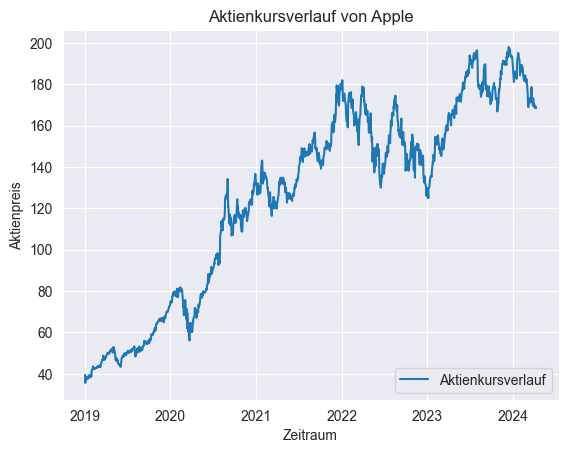

In [6]:
plt.title('Aktienkursverlauf von Apple')
plt.xlabel('Zeitraum', fontsize=10)
plt.ylabel('Aktienpreis', fontsize=10)
plt.plot(data['Close'])
plt.legend(['Aktienkursverlauf', 'Testdatensatz', 'Vorhersage'], loc='lower right')
plt.show()

Data preprocessing

In [26]:
dataFiltered = df.filter(['Close'])
dataset = dataFiltered.values
dataset

array([[ 39.47999954],
       [ 35.54750061],
       [ 37.06499863],
       ...,
       [168.82000732],
       [169.58000183],
       [168.44999695]])

In [8]:
# Trainingsdatensatzgrösse (95% der bezogenen Daten)
train_size = int(np.ceil(len(dataset) * .95))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(train_size), :]

In [9]:
train_data

array([[0.02419069],
       [0.        ],
       [0.00933486],
       ...,
       [0.9721338 ],
       [0.96567473],
       [0.92329103]])

In [10]:
def createTrainDataSet(input_dataset):
    x, y = [], []
    for i in range(60, len(input_dataset)):
        x.append(input_dataset[i - 60:i, 0])
        y.append(input_dataset[i, 0])
        if i <= 61:
            print(x)
            print(y)
            print()
    return np.array(x), np.array(y)


x_train, y_train = createTrainDataSet(train_data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02419069, 0.        , 0.00933486, 0.00882736, 0.01316416,
       0.01710111, 0.01785467, 0.01553247, 0.01201076, 0.01673203,
       0.01960784, 0.02102268, 0.02249905, 0.01708574, 0.01803921,
       0.01616301, 0.02394462, 0.02169935, 0.01920798, 0.03546328,
       0.03729335, 0.03741638, 0.0446905 , 0.04919645, 0.04928874,
       0.04421376, 0.04339869, 0.04189157, 0.04413687, 0.04304497,
       0.04399846, 0.04341406, 0.04419837, 0.04589004, 0.0443983 ,
       0.04733564, 0.04927335, 0.04942714, 0.05025758, 0.04761244,
       0.05041138, 0.05176471, 0.05127258, 0.04971934, 0.04661284,
       0.04724337, 0.0564552 , 0.05954633, 0.06077663, 0.06388311,
       0.06755862, 0.07048059, 0.06818915, 0.07069589, 0.08135332,
       0.07514033, 0.07158786, 0.06858899, 0.07117262, 0.07155709])]
[0.0734486651393094]

[array([0.02419069, 0.        , 0.00933486, 0.00882736, 0.01316416,
       0.01710111, 0.01785467, 0.01553247, 0.01201076, 0.01673203,
       0.01960784, 0.02102268, 0.022

In [11]:
x_train

array([[[0.02419069],
        [0.        ],
        [0.00933486],
        ...,
        [0.06858899],
        [0.07117262],
        [0.07155709]],

       [[0.        ],
        [0.00933486],
        [0.00882736],
        ...,
        [0.07117262],
        [0.07155709],
        [0.07344867]],

       [[0.00933486],
        [0.00882736],
        [0.01316416],
        ...,
        [0.07155709],
        [0.07344867],
        [0.07543253]],

       ...,

       [[0.8418454 ],
        [0.84959633],
        [0.85728568],
        ...,
        [0.97225686],
        [0.96887353],
        [0.96948862]],

       [[0.84959633],
        [0.85728568],
        [0.87315651],
        ...,
        [0.96887353],
        [0.96948862],
        [0.9721338 ]],

       [[0.85728568],
        [0.87315651],
        [0.88238373],
        ...,
        [0.96948862],
        [0.9721338 ],
        [0.96567473]]])

In [12]:
y_train

array([0.07344867, 0.07543253, 0.07970781, ..., 0.9721338 , 0.96567473,
       0.92329103])

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\Miro\IdeaProjects\tech-charts\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1199/1199 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 0.0033


In [16]:
test_data = scaled_data[train_size - 60:, :]

def createTestDataSet():
    x, y = [], []
    for i in range(60, len(test_data)):
        x.append(test_data[i - 60:i, 0])
    y = dataset[train_size:, :]
    return np.array(x), np.array(y)


X_test, y_test = createTestDataSet()
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


In [18]:
# RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.621338568574512

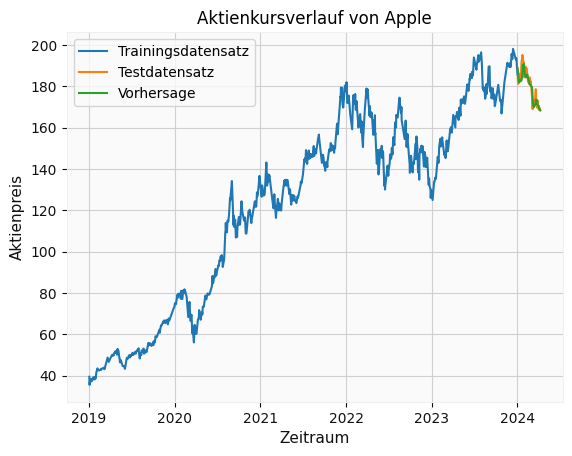

In [31]:
# Visualization
train = dataFiltered[:train_size]
valid = dataFiltered[train_size:].copy()
valid.loc[:, 'Predictions'] = predictions

# Gesamtansicht
plt.title('Aktienkursverlauf von Apple')
plt.xlabel('Zeitraum', fontsize=11)
plt.ylabel('Aktienpreis', fontsize=11)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trainingsdatensatz', 'Testdatensatz', 'Vorhersage'], loc='upper left')
plt.show()

In [44]:
predictions_df = valid['Predictions'].reset_index()

# Save the DataFrame to JSON
predictions_df.to_json('my_variable.json', orient='records')

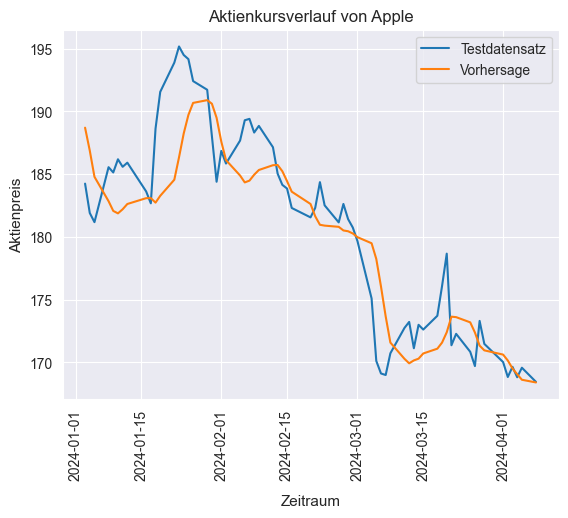

In [20]:
# Vergleich Echterkursverlauf und Vorhersage
plt.title('Aktienkursverlauf von Apple')
plt.xlabel('Zeitraum', fontsize=11, labelpad=10)
plt.ylabel('Aktienpreis', fontsize=11)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Testdatensatz', 'Vorhersage'], loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

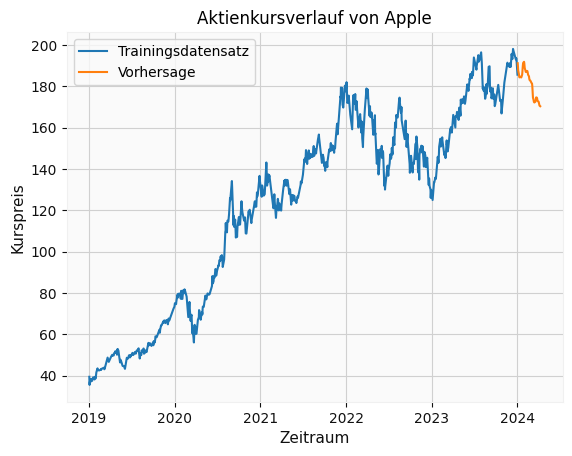

In [192]:
# Darstellung Gesamtelaufzeit und Prognose
plt.title('Aktienkursverlauf von Apple')
plt.xlabel('Zeitraum', fontsize=11)
plt.ylabel('Kurspreis', fontsize=11)
plt.plot(train['Close'])
plt.plot(valid[['Predictions']])
plt.legend(['Trainingsdatensatz', 'Vorhersage'], loc='upper left')
plt.show()